In [47]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns


In [48]:
data_files = glob.glob('output/*.out')

weak_scaling = [x for x in data_files if 'weak' in x]
strong_scaling = [x for x in data_files if 'strong' in x]

In [49]:


# read data
# Number of threads=1
# Wave zero-point        : -2.9974e-10
# Seismogram first coeff : -0.014087, -0.017407, -0.019272, -0.019317
# Elapsed time for FFTs  :    6.007
# Elapsed time without FFTs:    48.94
# Elapsed time:    54.95
# Checksum    :    23.2912760166628
def read_data_strong(file):
    with open(file, 'r') as f:
        lines = f.readlines()
    for i, line in enumerate(lines):
        if 'Number of threads' in line:
            n_threads = int(line.split('=')[1])
        if 'Elapsed time for FFTs' in line:
            fft_time = float(line.split(':')[1])
        if 'Elapsed time without FFTs' in line:
            no_fft_time = float(line.split(':')[1])
        if 'Elapsed time' in line:
            total_time = float(line.split(':')[1])
    return n_threads, fft_time, no_fft_time, total_time

def read_data_weak(file):
    if '64' in file:
        return 0, 0, 0, 0
    with open(file, 'r') as f:
        lines = f.readlines()
    for i, line in enumerate(lines):
        if 'Number of threads/cores' in line:

            n_threads = int(line.split(':')[1])
        if 'Elapsed time for FFTs' in line:
            fft_time = float(line.split(':')[1])
        if 'Elapsed time without FFTs' in line:
            no_fft_time = float(line.split(':')[1])
        if 'Elapsed time' in line:
            total_time = float(line.split(':')[1])
            
    return n_threads, fft_time, no_fft_time, total_time



In [50]:
weak_scaling_data = [read_data_weak(x) for x in weak_scaling]
strong_scaling_data = [read_data_strong(x) for x in strong_scaling]

In [51]:
# sort data by number of threads
weak_scaling_data.sort(key=lambda x: x[0])
strong_scaling_data.sort(key=lambda x: x[0])

# calculate average and error for each number of threads
n_threads = np.array([x[0] for x in weak_scaling_data])
fft_time = np.array([x[1] for x in weak_scaling_data])
no_fft_time = np.array([x[2] for x in weak_scaling_data])
total_time = np.array([x[3] for x in weak_scaling_data])
averaged_fft_time = np.array([np.mean(fft_time[n_threads == x]) for x in np.unique(n_threads)])[1:]
averaged_no_fft_time = np.array([np.mean(no_fft_time[n_threads == x]) for x in np.unique(n_threads)])[1:]
averaged_total_time = np.array([np.mean(total_time[n_threads == x]) for x in np.unique(n_threads)])[1:]
std_fft_time = np.array([np.std(fft_time[n_threads == x]) for x in np.unique(n_threads)])[1:]
std_no_fft_time = np.array([np.std(no_fft_time[n_threads == x]) for x in np.unique(n_threads)])[1:]
std_total_time = np.array([np.std(total_time[n_threads == x]) for x in np.unique(n_threads)])[1:]


n_threads_strong = np.array([x[0] for x in strong_scaling_data])
fft_time_strong = np.array([x[1] for x in strong_scaling_data])
no_fft_time_strong = np.array([x[2] for x in strong_scaling_data])
total_time_strong = np.array([x[3] for x in strong_scaling_data])
averaged_fft_time_strong = np.array([np.mean(fft_time_strong[n_threads_strong == x]) for x in np.unique(n_threads_strong)])
averaged_no_fft_time_strong = np.array([np.mean(no_fft_time_strong[n_threads_strong == x]) for x in np.unique(n_threads_strong)])
averaged_total_time_strong = np.array([np.mean(total_time_strong[n_threads_strong == x]) for x in np.unique(n_threads_strong)])
std_fft_time_strong = np.array([np.std(fft_time_strong[n_threads_strong == x]) for x in np.unique(n_threads_strong)])
std_no_fft_time_strong = np.array([np.std(no_fft_time_strong[n_threads_strong == x]) for x in np.unique(n_threads_strong)])
std_total_time_strong = np.array([np.std(total_time_strong[n_threads_strong == x]) for x in np.unique(n_threads_strong)])


#print all erros
print('Weak scaling error:', std_total_time)

print('Weak scaling FTT erro:', std_fft_time)

print('Weak scaling no FTT erro:', std_no_fft_time)
print('Strong scaling FTT erro:', std_fft_time_strong)
print('Strong scaling error:', std_total_time_strong)
print('Strong scaling no FTT erro:', std_no_fft_time_strong)



Weak scaling error: [0.0116619  0.00632456 1.27732533 0.70831067 0.52383203 0.3544009 ]
Weak scaling FTT erro: [0.01309045 0.02829417 0.31031597 0.41012193 0.53782525 0.38541406]
Weak scaling no FTT erro: [0.         0.02135416 0.97515947 0.43535732 0.01624808 0.08749857]
Strong scaling FTT erro: [0.00652993 0.03629656 0.14435567 0.0051923  0.00744043 0.02425366
 0.11705315 0.02904204 0.04215875 0.03997699 0.00581722 0.01743101
 0.01301691 0.01298307 0.01243543 0.01888491 0.01470238 0.04679573
 0.07251041 0.01562818 0.0142183  0.01377534 0.01048046 0.03333827
 0.00833307 0.00731027 0.00532917 0.00617738 0.00355528 0.00688186
 0.00682349 0.00244949 0.02340427 0.01251559 0.00958332 0.00821219
 0.01207642 0.01155162 0.02002399 0.00808455 0.02369304 0.01399143
 0.01612452 0.02173108 0.01705989 0.01165161 0.0245878  0.01952434
 0.01608229 0.01566397 0.0244344  0.01883189 0.0324863  0.00956243
 0.02451449 0.01057544 0.02215762 0.01130664 0.02764489 0.03785763
 0.02894823 0.02789695 0.0241694

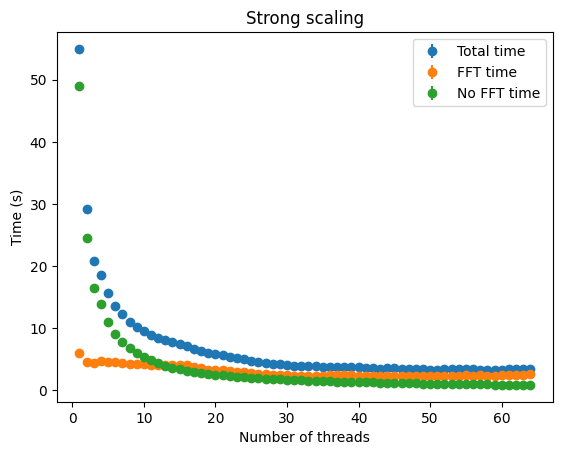

In [52]:
# plot the strong scaling data with error bars and make the plot look nice 
fig, ax = plt.subplots()
ax.errorbar(np.unique(n_threads_strong), averaged_total_time_strong, yerr=std_total_time_strong, fmt='o', label='Total time')
ax.errorbar(np.unique(n_threads_strong), averaged_fft_time_strong, yerr=std_fft_time_strong, fmt='o', label='FFT time')
ax.errorbar(np.unique(n_threads_strong), averaged_no_fft_time_strong, yerr=std_no_fft_time_strong, fmt='o', label='No FFT time')
ax.set_xlabel('Number of threads')
ax.set_ylabel('Time (s)')
ax.set_title('Strong scaling')
ax.legend()
plt.savefig('strong_scaling.png')

In [53]:
def amdal(n_threads, s):
    return 1 / (s + (1 - s) / n_threads)

array([1.        , 1.30058829, 1.38903262, 1.27100947, 1.3212779 ,
       1.339168  , 1.37123181, 1.40881829, 1.42775061, 1.4373058 ,
       1.47474004, 1.47005329, 1.47048467, 1.47199648, 1.47517417,
       1.48464349, 1.59388253, 1.70139203, 1.81904531, 1.80020357,
       1.86184903, 1.94495116, 2.0162956 , 2.08119333, 2.18541939,
       2.28594237, 2.35727166, 2.41192042, 2.47730082, 2.52218774,
       2.56960944, 2.61225022, 2.53644339, 2.54094482, 2.58152314,
       2.52494122, 2.49684438, 2.52091892, 2.52536536, 2.54352424,
       2.59444301, 2.62044623, 2.66669623, 2.56807311, 2.56391234,
       2.56085512, 2.57511134, 2.56325661, 2.62892367, 2.64464773,
       2.69949722, 2.57356843, 2.54352424, 2.54632453, 2.51585641,
       2.52727578, 2.52049627, 2.5291891 , 2.59937754, 2.4900207 ,
       2.44050325, 2.43496923, 2.42104839, 2.36357205])

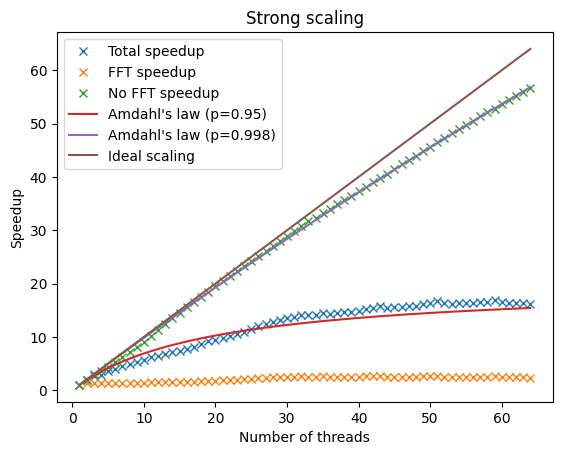

In [54]:
# plot the strong scaling data as speedup with amdahl's law
fig, ax = plt.subplots()
ax.plot(np.unique(n_threads_strong), averaged_total_time_strong[0]/averaged_total_time_strong, 'x', label='Total speedup')
ax.plot(np.unique(n_threads_strong), averaged_fft_time_strong[0]/averaged_fft_time_strong, 'x', label='FFT speedup')
ax.plot(np.unique(n_threads_strong), averaged_no_fft_time_strong[0]/averaged_no_fft_time_strong, 'x', label='No FFT speedup')
ax.plot(np.unique(n_threads_strong), amdal(np.unique(n_threads_strong), 0.05), label='Amdahl\'s law (p=0.95)')
ax.plot(np.unique(n_threads_strong), amdal(np.unique(n_threads_strong), 0.002), label='Amdahl\'s law (p=0.998)')
ax.plot(np.unique(n_threads_strong), np.unique(n_threads_strong), label='Ideal scaling')
ax.set_xlabel('Number of threads')
ax.set_ylabel('Speedup')
ax.set_title('Strong scaling')
ax.legend()
plt.savefig('strong_scaling_speedup.png')
averaged_fft_time_strong[0]/averaged_fft_time_strong

In [55]:
def gustafson(n_threads, s):
    return n_threads - (n_threads - 1) * s

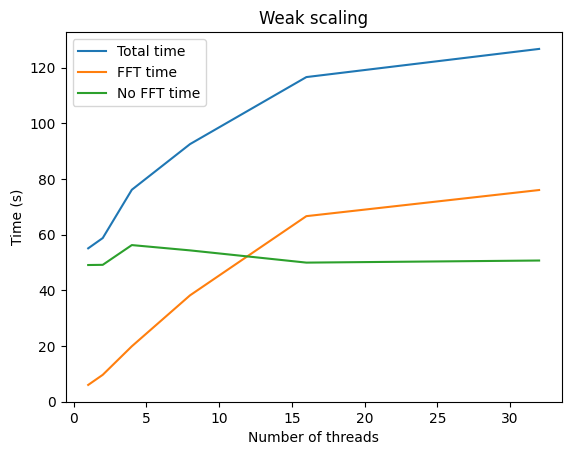

In [56]:
# plot the weak scaling data with error bars with seaborn and gustafson's law
fig, ax = plt.subplots()
n_threads = np.unique(n_threads)[1:]
sns.lineplot(x=n_threads, y=averaged_total_time, label='Total time')
sns.lineplot(x=n_threads, y=averaged_fft_time, label='FFT time')
sns.lineplot(x=n_threads, y=averaged_no_fft_time, label='No FFT time')
ax.set_xlabel('Number of threads')
ax.set_ylabel('Time (s)')
ax.set_title('Weak scaling')
ax.legend()
plt.savefig('weak_scaling.png')


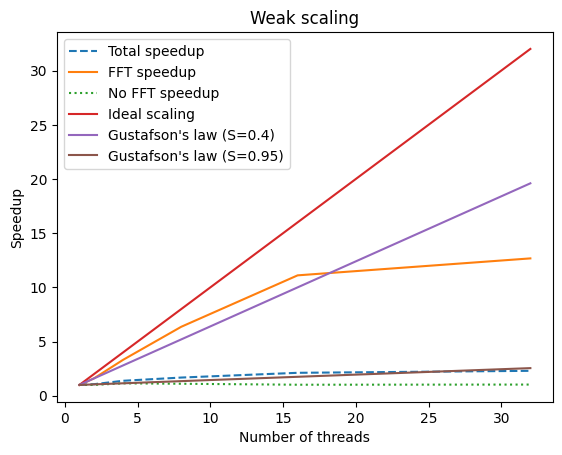

In [57]:
# plot the weak scaling data as speedup with gustafson's law
averaged_fft_time
fig, ax = plt.subplots()
ax.plot(n_threads, averaged_total_time/averaged_total_time[0],  linestyle='--',label='Total speedup')
ax.plot(n_threads, averaged_fft_time/averaged_fft_time[0], label='FFT speedup')
ax.plot(n_threads, averaged_no_fft_time/averaged_no_fft_time[0], linestyle=':', label='No FFT speedup')
ax.plot(n_threads, n_threads, label='Ideal scaling')
ax.plot(n_threads, gustafson(n_threads, 0.4), label='Gustafson\'s law (S=0.4)')
ax.plot(n_threads, gustafson(n_threads, 0.95), label='Gustafson\'s law (S=0.95)')


ax.set_xlabel('Number of threads')
ax.set_ylabel('Speedup')
ax.set_title('Weak scaling')
ax.legend()
plt.savefig('weak_scaling_speedup.png')
plt.show()


In [58]:
# Elapsed time for FFTs  :   0.3149
# Elapsed time without FFTs:    3.071
# Elapsed time:    3.386

# Elapsed time for FFTs  :   0.5091
# Elapsed time without FFTs:    3.077
# Elapsed time:    3.586

# Elapsed time for FFTs  :    1.085
# Elapsed time without FFTs:    3.501
# Elapsed time:    4.586

# Elapsed time for FFTs  :    2.158
# Elapsed time without FFTs:    3.515
# Elapsed time:    5.673


# Elapsed time for FFTs  :    4.045
# Elapsed time without FFTs:     3.14
# Elapsed time:    7.185

# Elapsed time for FFTs  :    4.697
# Elapsed time without FFTs:    3.182
# Elapsed time:    7.879

# Elapsed time for FFTs  :       10
# Elapsed time without FFTs:    3.368
# Elapsed time:    13.37


total_time_weak = np.array([3.386, 3.586, 4.586, 5.673, 7.185, 7.879, 13.37])
fft_time_weak = np.array([0.3149, 0.5091, 1.085, 2.158, 4.045, 4.697, 10])
no_fft_time_weak = np.array([3.077, 3.077, 3.501, 3.515, 3.14, 3.182, 3.368])


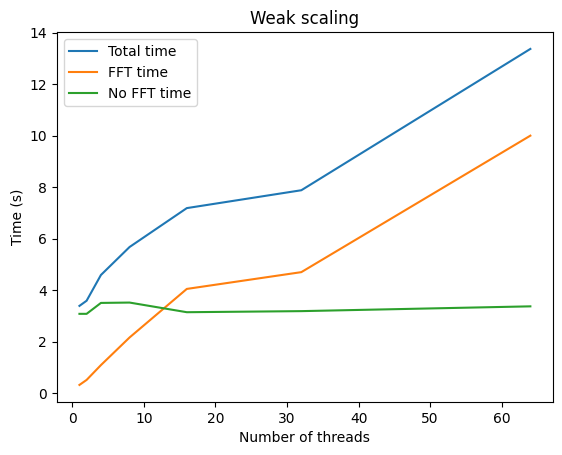

In [59]:
fig, ax = plt.subplots()
n_threads = np.array([1, 2, 4, 8, 16, 32, 64])
sns.lineplot(x=n_threads, y=total_time_weak, label='Total time')
sns.lineplot(x=n_threads, y=fft_time_weak, label='FFT time')
sns.lineplot(x=n_threads, y=no_fft_time_weak, label='No FFT time')
ax.set_xlabel('Number of threads')
ax.set_ylabel('Time (s)')
ax.set_title('Weak scaling')
ax.legend()
plt.savefig('weak_scaling2.png')